In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\n13,0,3,"Saundercock, Mr

In [ ]:
df=pd.read_csv('/content/titanic.csv')
print(df.head())
print(df.shape)
print(df.columns)
print(df.describe)
print(df.dtypes)
print(df.tail())
print("\nBefore Cleaning Data")
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
print("\nAfter Cleaning Data")
print(df.isnull().sum())
df[(df['Sex']=='female') & (df['Age']<30) & (df['Fare']> 7.2500) & (df['SibSp']>1) &(df['Embarked']=="S")]
df.sort_values(by='Age',ascending=True)
df.sort_values(by='Fare',ascending=False)
df.groupby("Pclass")['Fare'].max()
df.groupby("Pclass")['Fare'].min()
df.groupby('Sex')['Age'].max()
df.groupby("Pclass")['Fare'].sum()
df.groupby("Pclass")['Age'].mean()
df['FamilySize']=df['SibSp'] + df['Parch'] +1
df['FarePerPerson']=df['FamilySize']/df['Fare']
df['IsAlone']=(df['FamilySize']>1).astype(int)
df['Title']=df['Name'].str.extract('([A-za-z]+)\.',expand=False)
df['Sex']=df['Sex'].map({'male':1,'female':0})
df['Embarked']=df['Embarked'].map({'S':0,"C":1,"Q":2})
bins=[0,10,18,30,50]

labels=labels=['Child','Teenage','Adult','Senior']
df['AgeGroup']=pd.cut(df["Age"],bins=bins,labels=labels)
df.drop('Cabin',axis=1,inplace=True)
df['AgeGroup'].fillna(df['AgeGroup'].mode()[0],inplace=True)
print(df.isnull().sum())
print(df.head())
df.loc[0,['Name','Age','Sex']]
df.iloc[0:3,1:5]


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

<>:25: SyntaxWarning: invalid escape sequence '\.'
<>:25: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3844631312.py:25: SyntaxWarning: invalid escape sequence '\.'
  df['Title']=df['Name'].str.extract('([A-za-z]+)\.',expand=False)
/tmp/ipython-input-3844631312.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/tmp/ipython-input-3844631312.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using a

,Survived,Pclass,Name,Sex
0,0,3,"Braund, Mr. Owen Harris",1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,1,3,"Heikkinen, Miss. Laina",0


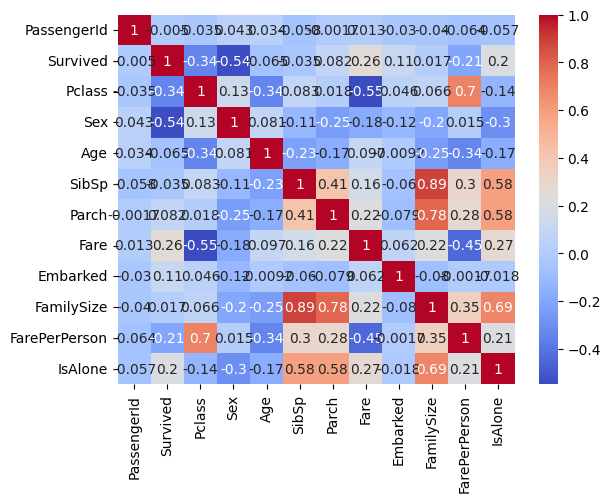

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric columns
corr = df.select_dtypes(include=['number']).corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


#count plot

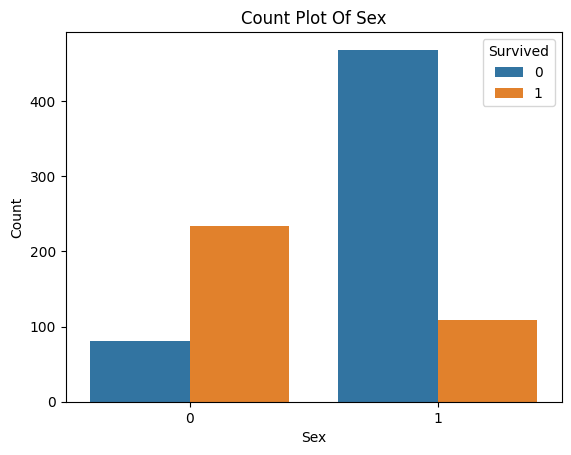

In [ ]:
sns.countplot(x="Sex",hue='Survived',data=df)
plt.title("Count Plot Of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

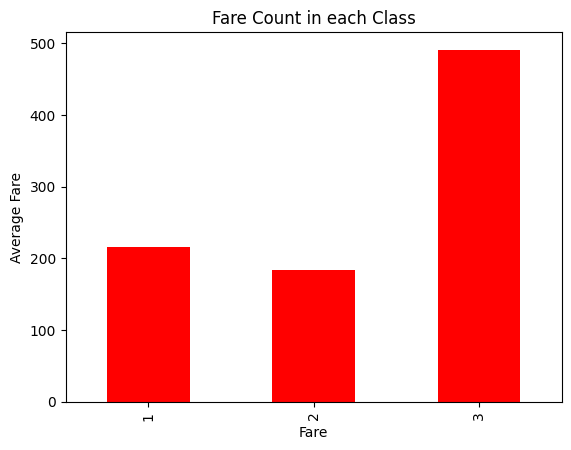

In [ ]:
avg_fare=df.groupby("Pclass")['Fare'].count()
avg_fare.plot(kind='bar',color='red')
plt.title("Fare Count in each Class")
plt.xlabel("Fare")
plt.ylabel("Average Fare")
plt.show()

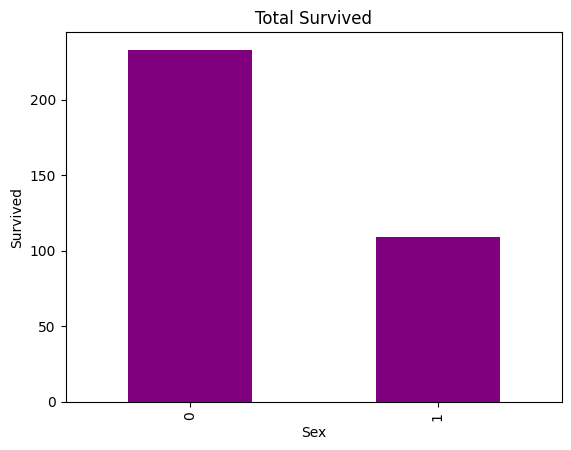

In [ ]:
total_survive=df.groupby('Sex')['Survived'].sum()
total_survive.plot(kind='bar',color='purple')
plt.title("Total Survived")
plt.xlabel('Sex')
plt.ylabel("Survived")
plt.show()

In [ ]:
df.reset_index(inplace=True)

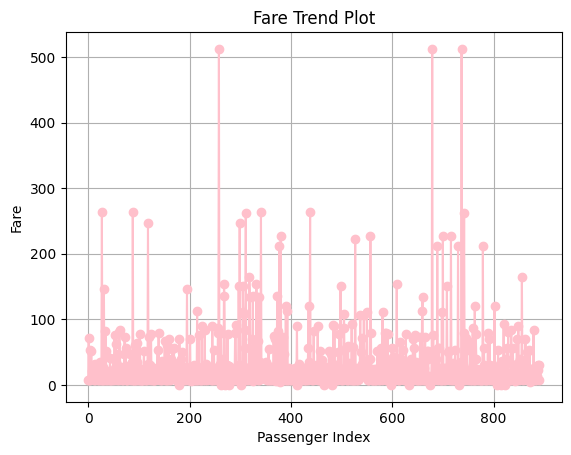

In [ ]:
df['Fare'].plot(kind='line',marker='o',linestyle='-',color='pink')
plt.title("Fare Trend Plot")
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

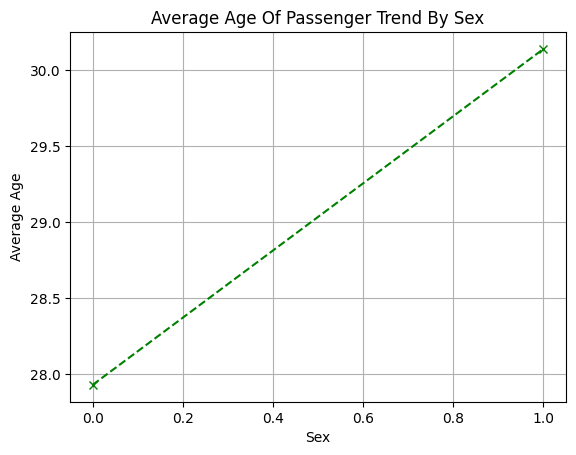

In [ ]:
average_age=df.groupby("Sex")['Age'].mean()
average_age.plot(kind='line',marker='x',linestyle='--',color='green')
plt.xlabel("Sex")
plt.ylabel("Average Age")
plt.title("Average Age Of Passenger Trend By Sex")
plt.grid(True)
plt.show()

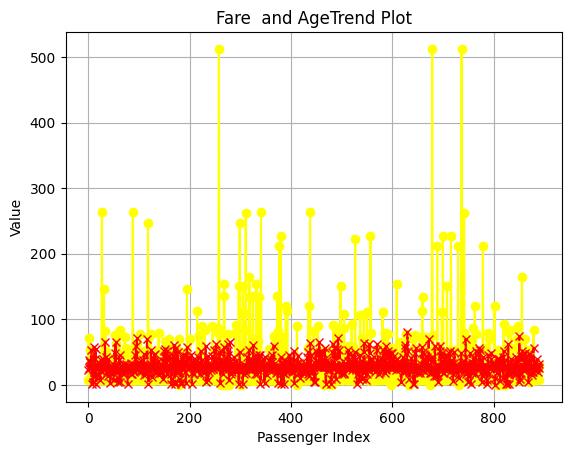

In [ ]:
df['Fare'].plot(kind='line',marker='o',linestyle='-',color='yellow')
df['Age'].plot(kind='line',marker='x',linestyle='--',color='red')

plt.title("Fare  and AgeTrend Plot")
plt.xlabel("Passenger Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

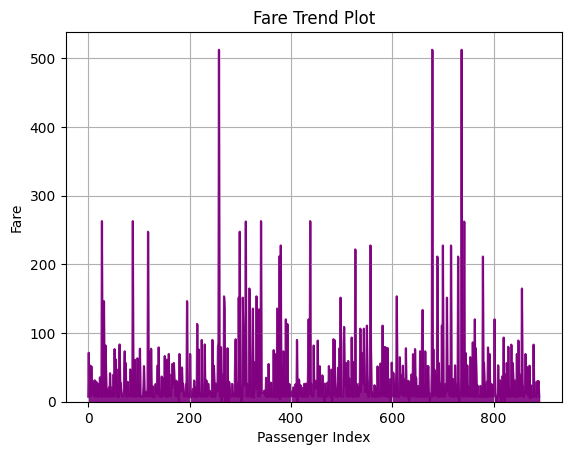

In [ ]:
df['Fare'].plot(kind='area',alpha=0.9,linestyle='-',color='purple')
plt.title("Fare Trend Plot")
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.grid(True)
plt.show()

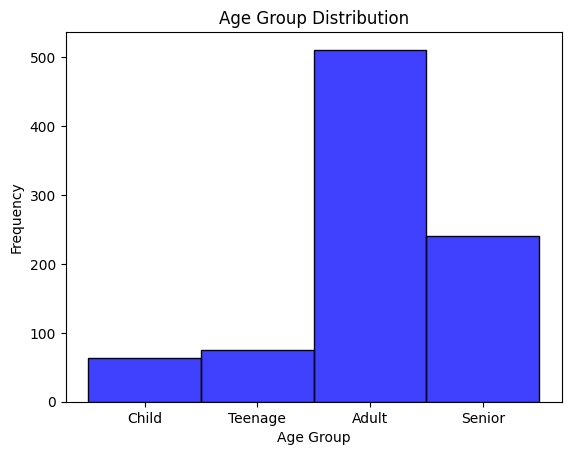

In [ ]:
sns.histplot(x='AgeGroup',bins=10,data=df,color='blue')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

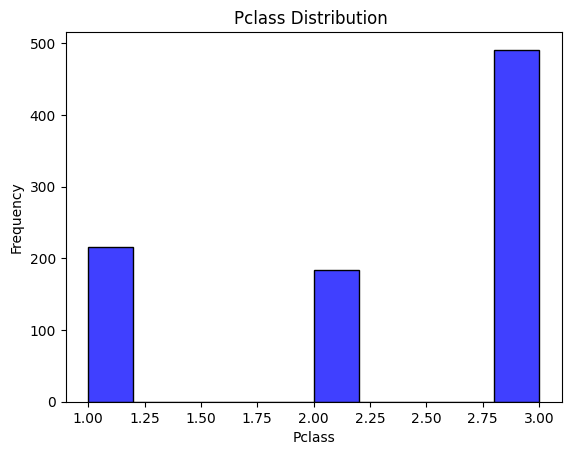

In [ ]:
sns.histplot(x='Pclass',bins=10,data=df,color='blue')
plt.title("Pclass Distribution ")
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.show()

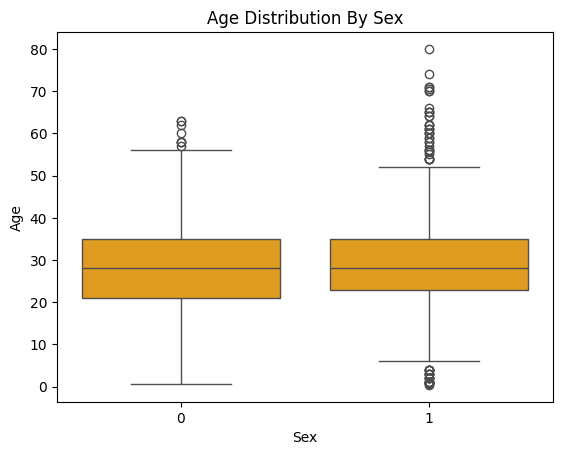

In [ ]:
sns.boxplot(x='Sex',y='Age',data=df,color='orange')
plt.title("Age Distribution By Sex")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

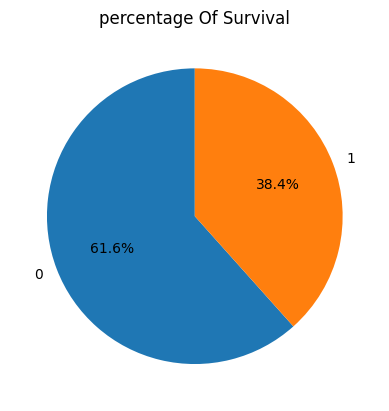

In [ ]:
survived=df['Survived'].value_counts()
plt.pie(survived,labels=survived.index,autopct='%.1f%%',startangle=90)
plt.title("percentage Of Survival")
plt.show()

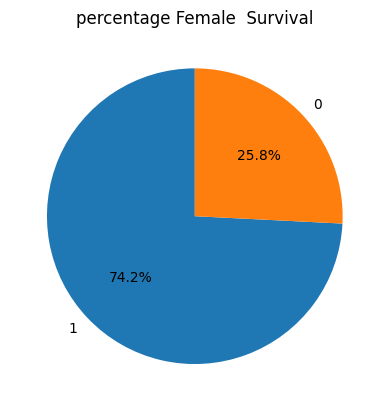

In [ ]:
female=df[df['Sex']==0]
female_survived=female['Survived'].value_counts()
plt.pie(female_survived,labels=female_survived.index,autopct='%.1f%%',startangle=90)
plt.title("percentage Female  Survival")
plt.show()

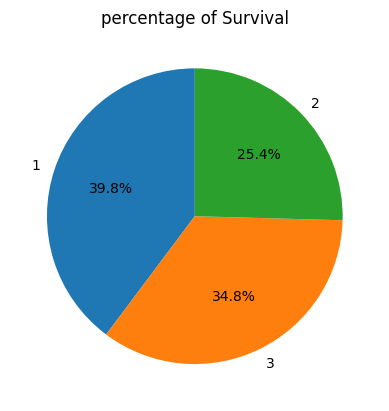

In [ ]:
survived=df[df['Survived']==1]
survived=survived['Pclass'].value_counts()
plt.pie(survived,labels=survived.index,autopct='%.1f%%',startangle=90)
plt.title("percentage of Survival")
plt.show()

In [ ]:
!pip install pyWaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 74.4 MB/s eta 0:00:00


In [ ]:
from pywaffle import Waffle

In [ ]:
count=df[df['Sex']==0].shape[0]
print(count)
count=df[df['Sex']==1].shape[0]
print(count)


314
577


In [ ]:
count=df[df['Survived']==0].shape[0]
print(count)
count=df[df['Survived']==1].shape[0]
print(count)

549
342


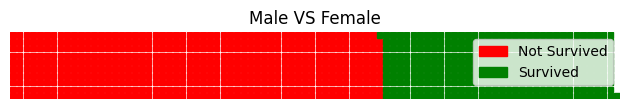

In [ ]:
plt.figure(
    FigureClass=Waffle,
    rows=10,
    values={'Not Survived':549,'Survived':342},
    colors=['red','green']
)
plt.title("Male VS Female")
plt.show()

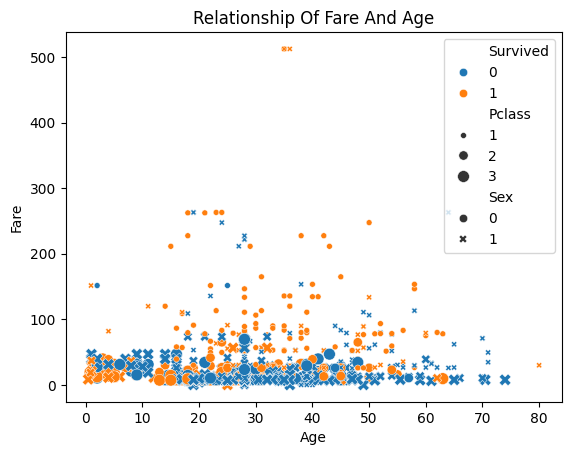

In [ ]:
sns.scatterplot(x='Age',y="Fare",style='Sex',hue='Survived',size='Pclass',data=df)

plt.title("Relationship Of Fare And Age")
plt.show()

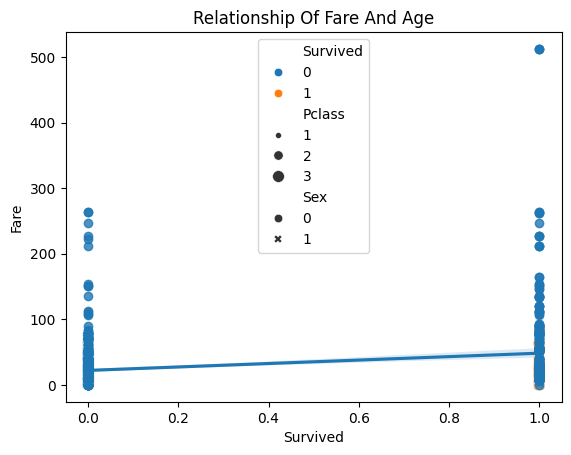

In [ ]:
sns.scatterplot(x='Survived',y="Age",style='Sex',hue='Survived',size='Pclass',data=df)
sns.regplot(x='Survived',y='Fare',data=df,scatter_kws={'alpha':0.8})
plt.title("Relationship Of Fare And Age")
plt.show()


In [ ]:
!pip install wordcloud

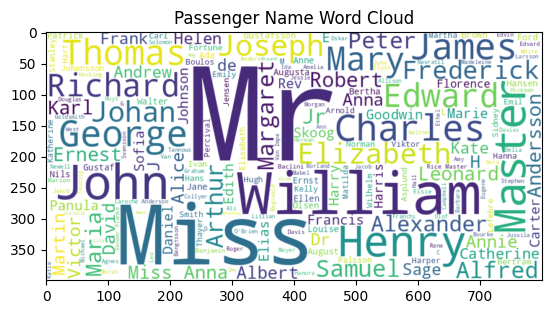

In [ ]:
from wordcloud import WordCloud
text=' '.join(df["Name"])
wordcloud=WordCloud(width=800,height=400,background_color='White').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis=("off")
plt.title("Passenger Name Word Cloud")
plt.show()

In [ ]:
print(df.head())

                                                    PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   

                                                    Pclass  Sex   Age  SibSp  \
Name                                                                           
Braund, Mr. Owen Harris                                  3    1  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1    0  38.0      1   
Heikkinen, Miss. Laina                                   3    0  26.0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  

In [ ]:
group_age=df.groupby('AgeGroup')['Fare'].sum()
print(group_age)

AgeGroup
Child       1947.8041
Teenage     2569.7961
Adult      14049.4200
Senior     10126.9291
Name: Fare, dtype: float64


/tmp/ipython-input-3743142837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_age=df.groupby('AgeGroup')['Fare'].sum()
